# First Name:Yanqing
# Last Name:Zhong

# Import Libraries  

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf #可能重复了要去掉
import scipy

# Import Data

In [40]:
bottle=pd.read_csv('bottle.csv',low_memory=False)
pd.set_option('display.float_format',lambda x:'%f'%x)
print(len(bottle)) # number of rows (observations)

864863


# Data management 

In [41]:
# Convert variable to numeric
bottle['Depthm']=pd.to_numeric(bottle['Depthm'],errors='coerce')
bottle['ChlorA']=pd.to_numeric(bottle['ChlorA'],errors='coerce')
bottle['STheta']=pd.to_numeric(bottle['STheta'],errors='coerce') 
bottle['NO2uM']=pd.to_numeric(bottle['NO3uM'],errors='coerce')
bottle['O2ml_L']=pd.to_numeric(bottle['O2ml_L'],errors='coerce') 

In [42]:
# Convert Quality code to numeric
bottle['NO2q']=pd.to_numeric(bottle['NO3q'],errors='coerce') 
bottle['SThtaq']=pd.to_numeric(bottle['SThtaq'],errors='coerce') 
bottle['Chlqua']=pd.to_numeric(bottle['Chlqua'],errors='coerce') 
bottle['O_qual']=pd.to_numeric(bottle['O_qual'],errors='coerce') 

In [43]:
# Converts "Date" column to datetime format
bottle['Date']=pd.to_datetime(bottle['Date'])

In [44]:
# Replace null values
bottle['NO2q'].replace('null', np.nan, inplace=True)
bottle['SThtaq'].replace('null', np.nan, inplace=True)
bottle['Chlqua'].replace('null', np.nan, inplace=True)
bottle['O_qual'].replace('null', np.nan, inplace=True)

# Create subset

In [45]:
sub1 = bottle[(bottle['Date'].dt.year == 2010) & 
              (bottle['Depthm'] > 50) & (bottle['Depthm'] <= 100) & 
              ((bottle['NO2q'].isnull()) | (bottle['NO2q'] == 6))&
              ((bottle['SThtaq'].isnull()) | (bottle['SThtaq'] == 6))&
             ((bottle['Chlqua'].isnull()) | (bottle['Chlqua'] == 6))&
              ((bottle['O_qual'].isnull()) | (bottle['O_qual'] == 6))]

In [86]:
sub2=sub1.copy()
print(len(sub2))

1154


In [87]:
sub3=sub2[['O2ml_L','STheta','NO2uM','ChlorA']].dropna()

# Correlation between each explantory variable and response variable

### Response variable:          Oxygen (O2ml_L)
### Explanatory variable 1:    Density of Water(STheta)
### Explanatory variable 2:    Nitrite concentration(NO2uM)
### Explanatory variable 3:    Chlorophyll-a (ChlorA)

In [10]:
print ('association between Potential Density of Water and Oxygen ') 
print (scipy.stats.pearsonr(sub3['STheta'], sub3['O2ml_L'])) # Explanatory variable 1 

association between Potential Density of Water and Oxygen 
PearsonRResult(statistic=-0.9242361224470874, pvalue=0.0)


In [11]:
print ('association between Nitrite concentration and Oxygen') 
print (scipy.stats.pearsonr(sub3['NO2uM'], sub3['O2ml_L']))# Explanatory variable 2

association between Nitrite concentration and Oxygen
PearsonRResult(statistic=-0.9554413932382059, pvalue=0.0)


In [12]:
print ('association between chlorophyll-a and Oxygen')  
print (scipy.stats.pearsonr(sub3['ChlorA'], sub3['O2ml_L']))# Explanatory variable 3

association between chlorophyll-a and Oxygen
PearsonRResult(statistic=0.07985471297712628, pvalue=0.0066454916029353465)


# Scatter plot between each explantory variable and response variable

## Scatter plot 1_01 Linear Regression 

<IPython.core.display.Javascript object>


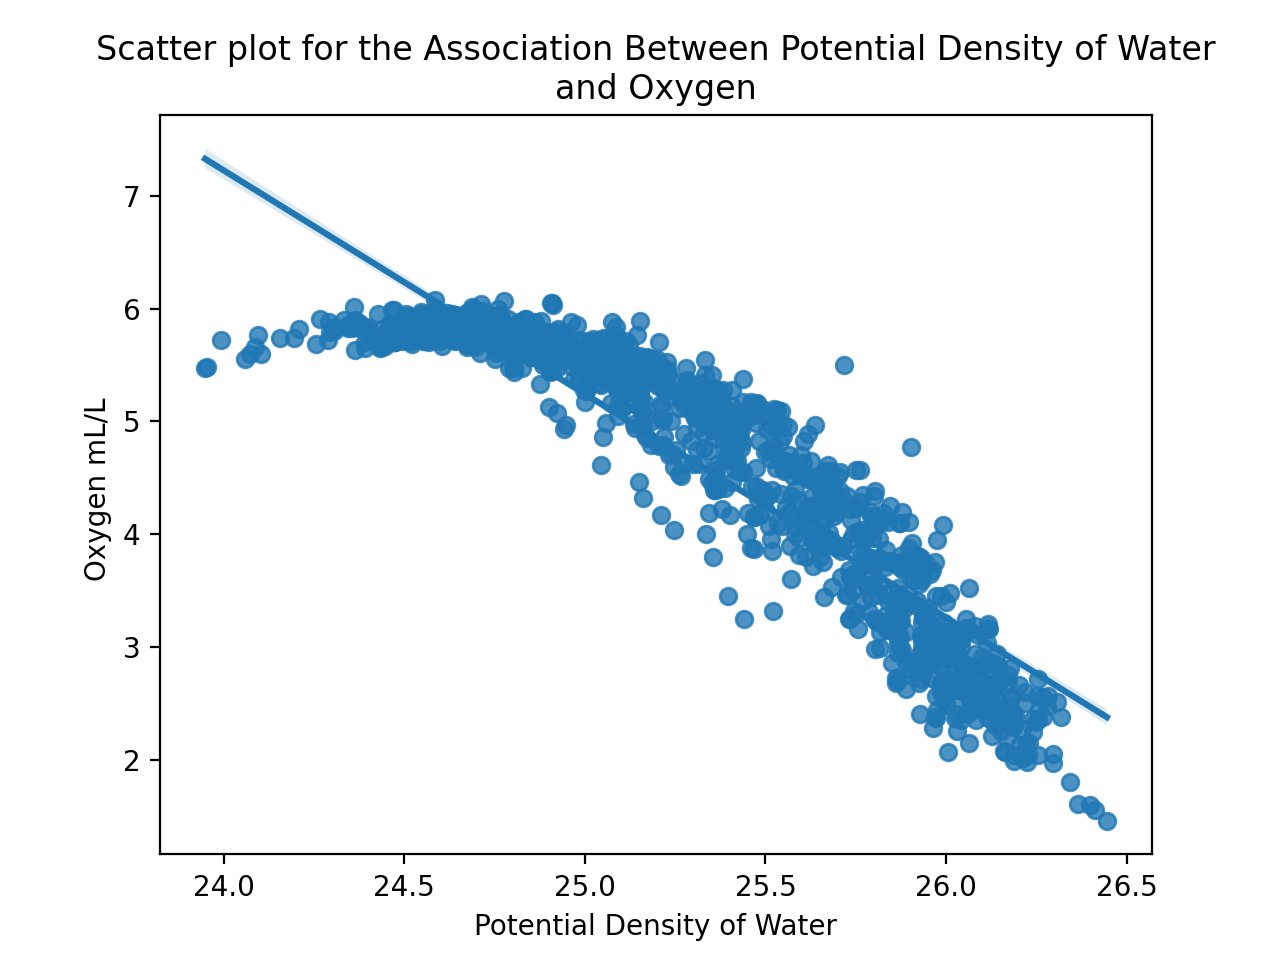

Text(0.5, 1.0, 'Scatter plot for the Association Between Potential Density of Water\nand Oxygen')

In [88]:
# x= Density of Water (STheta)
# y= Oxygen  (O2ml_L)
%matplotlib notebook
plt.figure()
scat1 = sns.regplot(x="STheta", y="O2ml_L", fit_reg=True, data=sub3)
plt.xlabel('Potential Density of Water')
plt.ylabel('Oxygen mL/L ')
plt.title('Scatter plot for the Association Between Potential Density of Water'  + '\n'+ 'and Oxygen')

## Scatter plot 1_02 Polynomial Regression

<IPython.core.display.Javascript object>


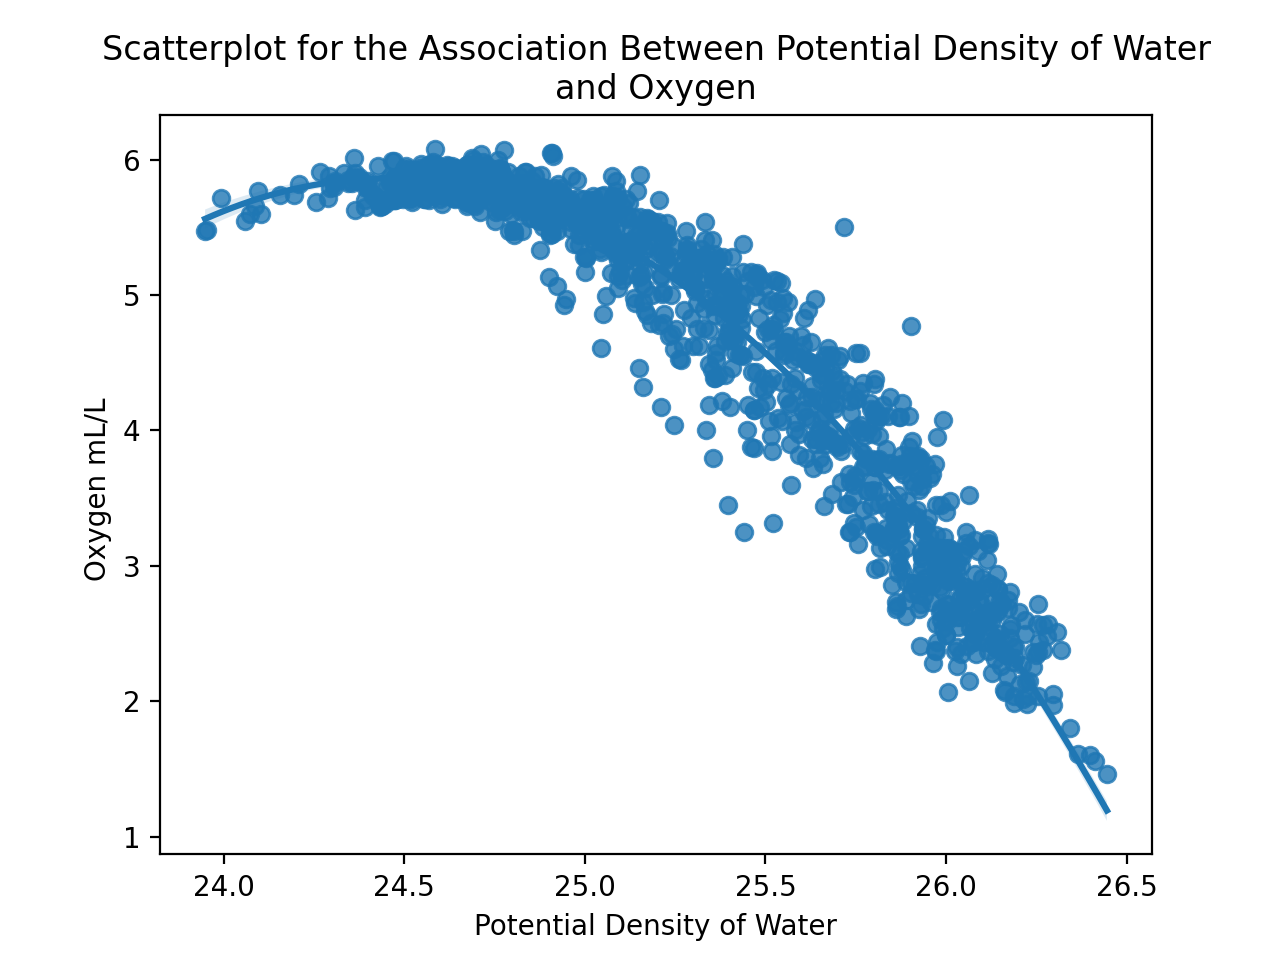

Text(0.5, 1.0, 'Scatterplot for the Association Between Potential Density of Water\nand Oxygen')

In [89]:
# x= Density of Water (STheta)
# y= Oxygen  (O2ml_L)
# order= 2
%matplotlib notebook
plt.figure()
scat1 = sns.regplot(x="STheta", y="O2ml_L", order=2, data=sub3)
plt.xlabel('Potential Density of Water')
plt.ylabel('Oxygen mL/L ')
plt.title('Scatterplot for the Association Between Potential Density of Water'  + '\n'+ 'and Oxygen')

## Scatter plot 2_01 Linear Regression

<IPython.core.display.Javascript object>


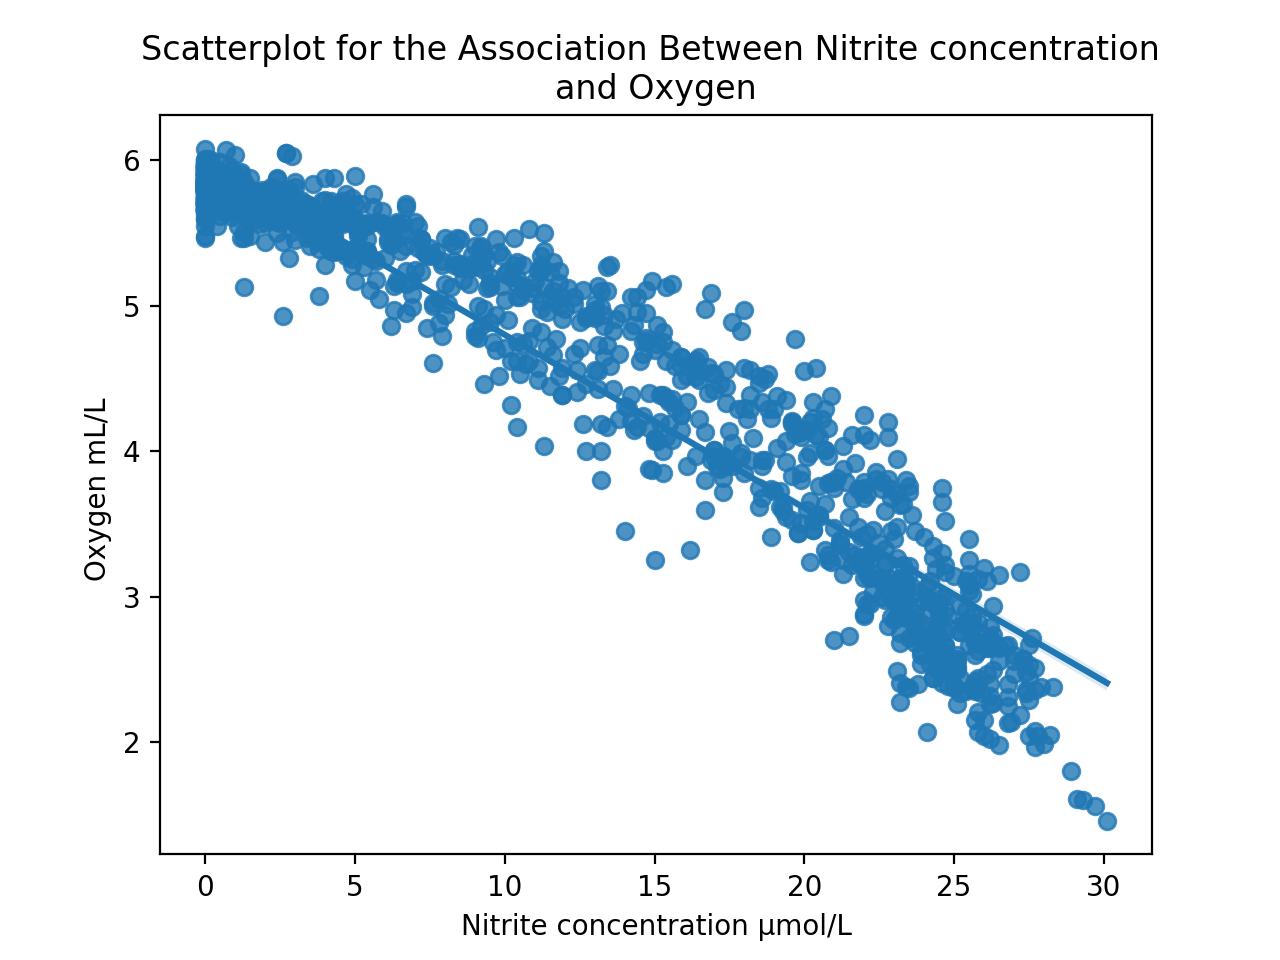

Text(0.5, 1.0, 'Scatterplot for the Association Between Nitrite concentration \nand Oxygen')

In [90]:
# x= Nitrite concentration(NO2uM)
# y= oxygen (O2ml_L)

%matplotlib notebook
plt.figure()
scat1 = sns.regplot(x="NO2uM", y="O2ml_L", fit_reg=True, data=sub3)
plt.xlabel('Nitrite concentration μmol/L')
plt.ylabel('Oxygen mL/L ')
plt.title('Scatterplot for the Association Between Nitrite concentration '+ '\n'+ 'and Oxygen')

## Scatter plot 2_02 Polynomial Regression

<IPython.core.display.Javascript object>


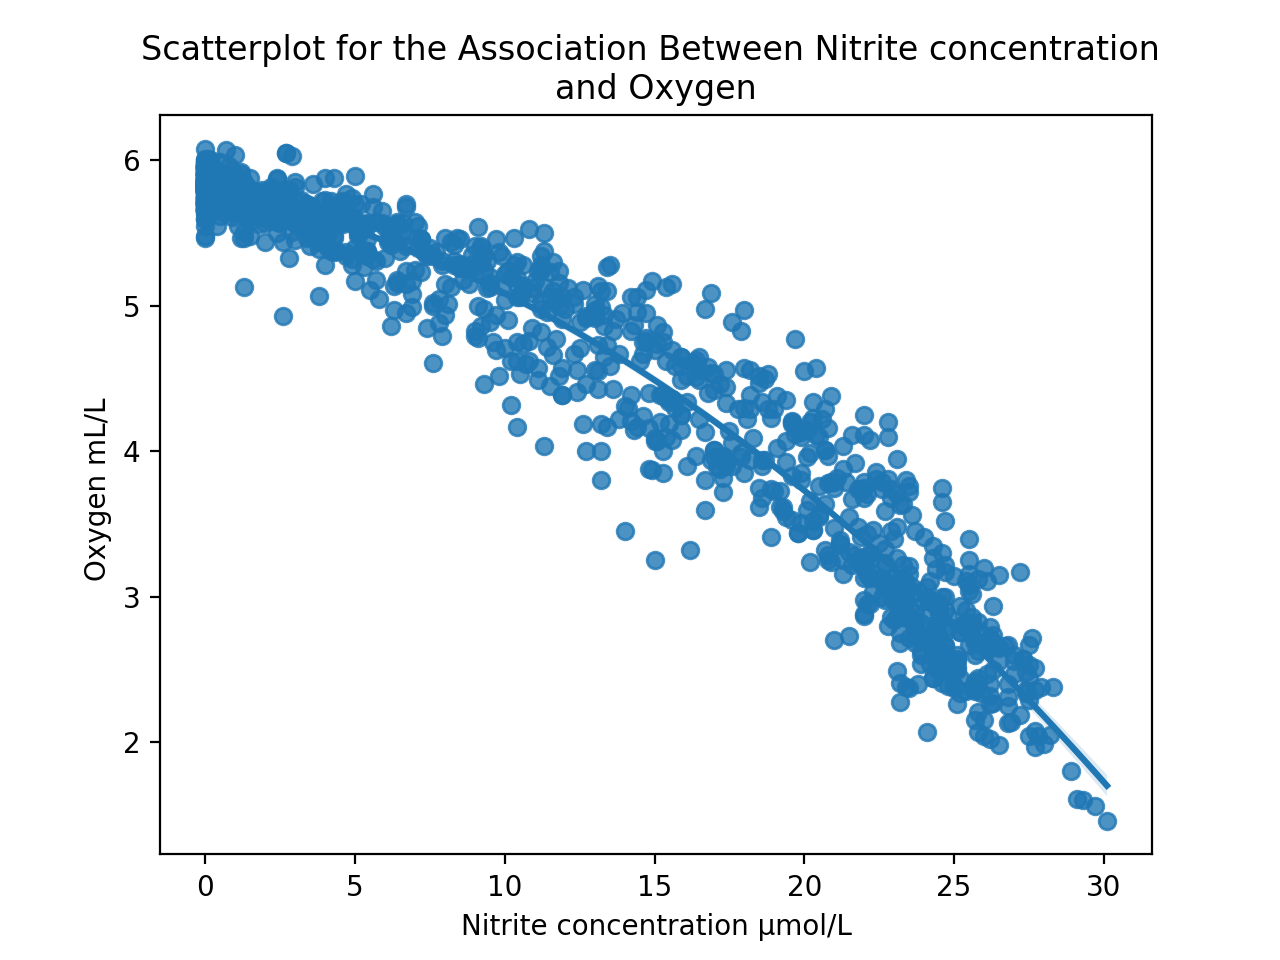

Text(0.5, 1.0, 'Scatterplot for the Association Between Nitrite concentration \nand Oxygen')

In [91]:
# x= Nitrite concentration(NO2uM)
# y= oxygen (O2ml_L)

%matplotlib notebook
plt.figure()
scat1 = sns.regplot(x="NO2uM", y="O2ml_L", order=2, data=sub3)
plt.xlabel('Nitrite concentration μmol/L')
plt.ylabel('Oxygen mL/L ')
plt.title('Scatterplot for the Association Between Nitrite concentration '+ '\n'+ 'and Oxygen')

## Scater plot 3

<IPython.core.display.Javascript object>


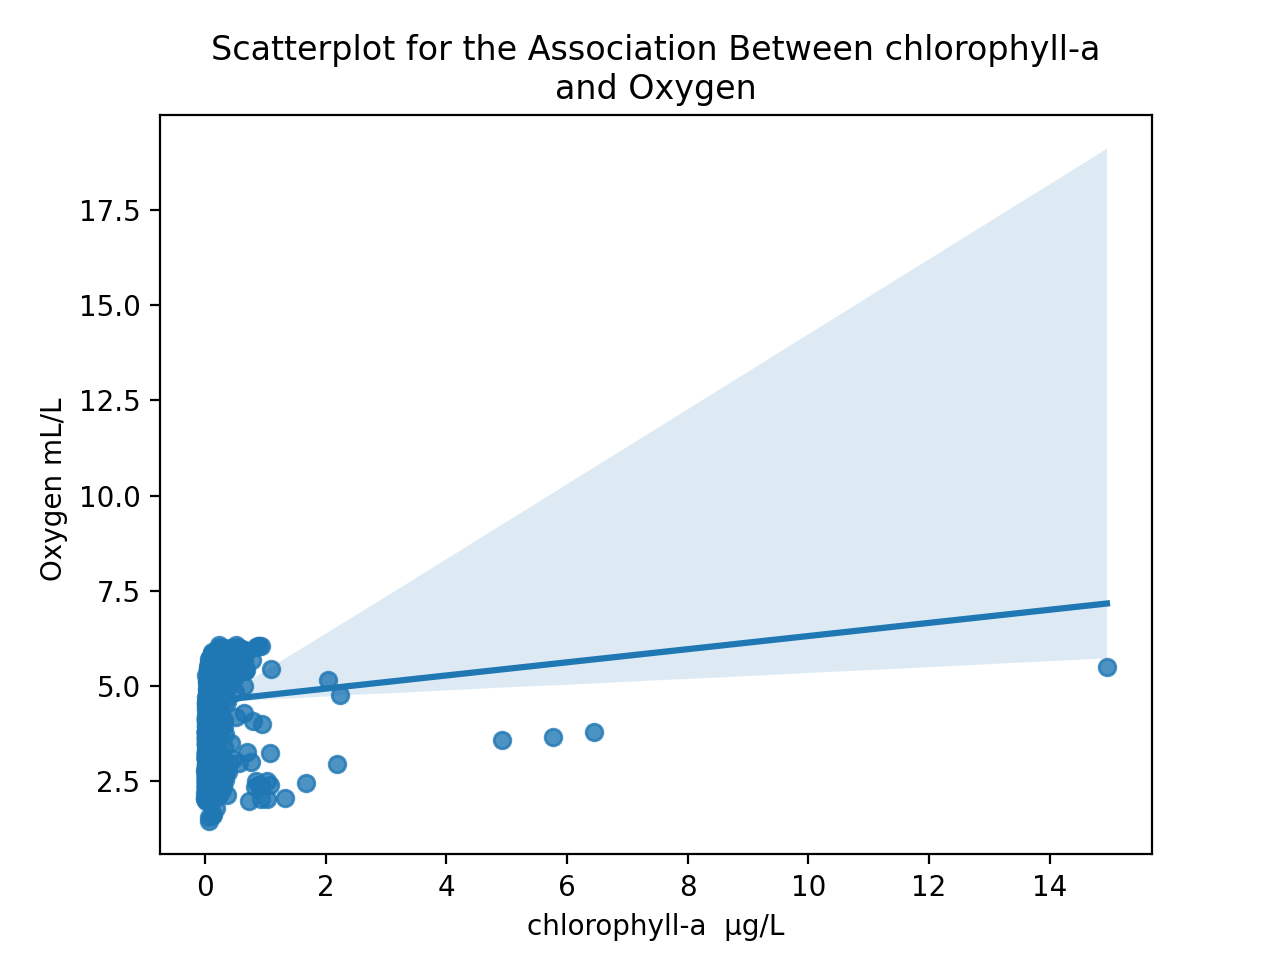

Text(0.5, 1.0, 'Scatterplot for the Association Between chlorophyll-a\nand Oxygen')

In [51]:
# x= chlorophyll-a (ChlorA)
# y= oxygen (O2ml_L)

%matplotlib notebook
plt.figure()
scat1 = sns.regplot(x="ChlorA", y="O2ml_L", fit_reg=True, data=sub3)
plt.xlabel('chlorophyll-a  µg/L')
plt.ylabel('Oxygen mL/L ')
plt.title('Scatterplot for the Association Between chlorophyll-a'+ '\n'+ 'and Oxygen')

# Regression Analysis for reg1 to reg6

In [93]:
# center quantitative variables for regression analysis
sub3['ChlorA_c'] = (sub3['ChlorA'] - sub3['ChlorA'].mean())
sub3['STheta_c'] = (sub3['STheta'] - sub3['STheta'].mean())
sub3['NO2uM_c'] = (sub3['NO2uM'] - sub3['NO2uM'].mean())
sub3['O2ml_L_c'] = (sub3['O2ml_L'] - sub3['O2ml_L'].mean())
sub3.head(2)

,O2ml_L,STheta,NO2uM,ChlorA,ChlorA_c,STheta_c,NO2uM_c,O2ml_L_c
809701,5.710000,24.997000,2.800000,0.240000,0.030225,-0.315880,-8.701213,1.087106
809702,5.310000,25.281000,9.400000,0.090000,-0.119775,-0.031880,-2.101213,0.687106


# Reg1

In [19]:
reg1 = smf.ols('ChlorA_c ~ STheta_c + NO2uM_c + O2ml_L_c', data=sub3).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:               ChlorA_c   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     8.977
Date:                Wed, 03 May 2023   Prob (F-statistic):           7.03e-06
Time:                        16:29:01   Log-Likelihood:                -945.18
No. Observations:                1154   AIC:                             1898.
Df Residuals:                    1150   BIC:                             1919.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.201e-15      0.016  -1.36e-13      1.0

# Reg 2

In [20]:
reg2 = smf.ols('STheta_c ~ ChlorA_c + NO2uM_c + O2ml_L_c', data=sub3).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:               STheta_c   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     8300.
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        16:29:01   Log-Likelihood:                 833.05
No. Observations:                1154   AIC:                            -1658.
Df Residuals:                    1150   BIC:                            -1638.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.794e-15      0.003   1.09e-12      1.0

# Reg 3

In [21]:
reg3 = smf.ols('NO2uM_c ~ ChlorA_c + STheta_c+ O2ml_L_c', data=sub3).fit()
print (reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                NO2uM_c   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.410e+04
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        16:29:01   Log-Likelihood:                -2155.4
No. Observations:                1154   AIC:                             4319.
Df Residuals:                    1150   BIC:                             4339.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.644e-14      0.046  -3.56e-13      1.0

# Reg 4

In [22]:
reg4 = smf.ols('O2ml_L_c ~ ChlorA_c + STheta_c+ NO2uM_c', data=sub3).fit()
print (reg4.summary())

                            OLS Regression Results                            
Dep. Variable:               O2ml_L_c   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     4109.
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        16:29:01   Log-Likelihood:                -427.91
No. Observations:                1154   AIC:                             863.8
Df Residuals:                    1150   BIC:                             884.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.626e-15      0.010  -1.57e-13      1.0

# Reg 5

In [60]:
reg5 = smf.ols('O2ml_L_c ~ ChlorA_c+NO2uM_c+I(STheta_c**2)', data=sub3).fit()
print (reg5.summary())

                            OLS Regression Results                            
Dep. Variable:               O2ml_L_c   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     5629.
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        16:31:01   Log-Likelihood:                -259.70
No. Observations:                1154   AIC:                             527.4
Df Residuals:                    1150   BIC:                             547.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1982      0.013  

# Reg6

In [59]:
reg6 = smf.ols('O2ml_L_c ~ ChlorA_c + I(NO2uM_c**2) + I(STheta_c**2)', data=sub3).fit()
print (reg6.summary())

                            OLS Regression Results                            
Dep. Variable:               O2ml_L_c   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 03 May 2023   Prob (F-statistic):           5.21e-71
Time:                        16:30:53   Log-Likelihood:                -1683.0
No. Observations:                1154   AIC:                             3374.
Df Residuals:                    1150   BIC:                             3394.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7564      0.053  

# Q-Q plot for reg1 to 6

# Reg 1

<IPython.core.display.Javascript object>


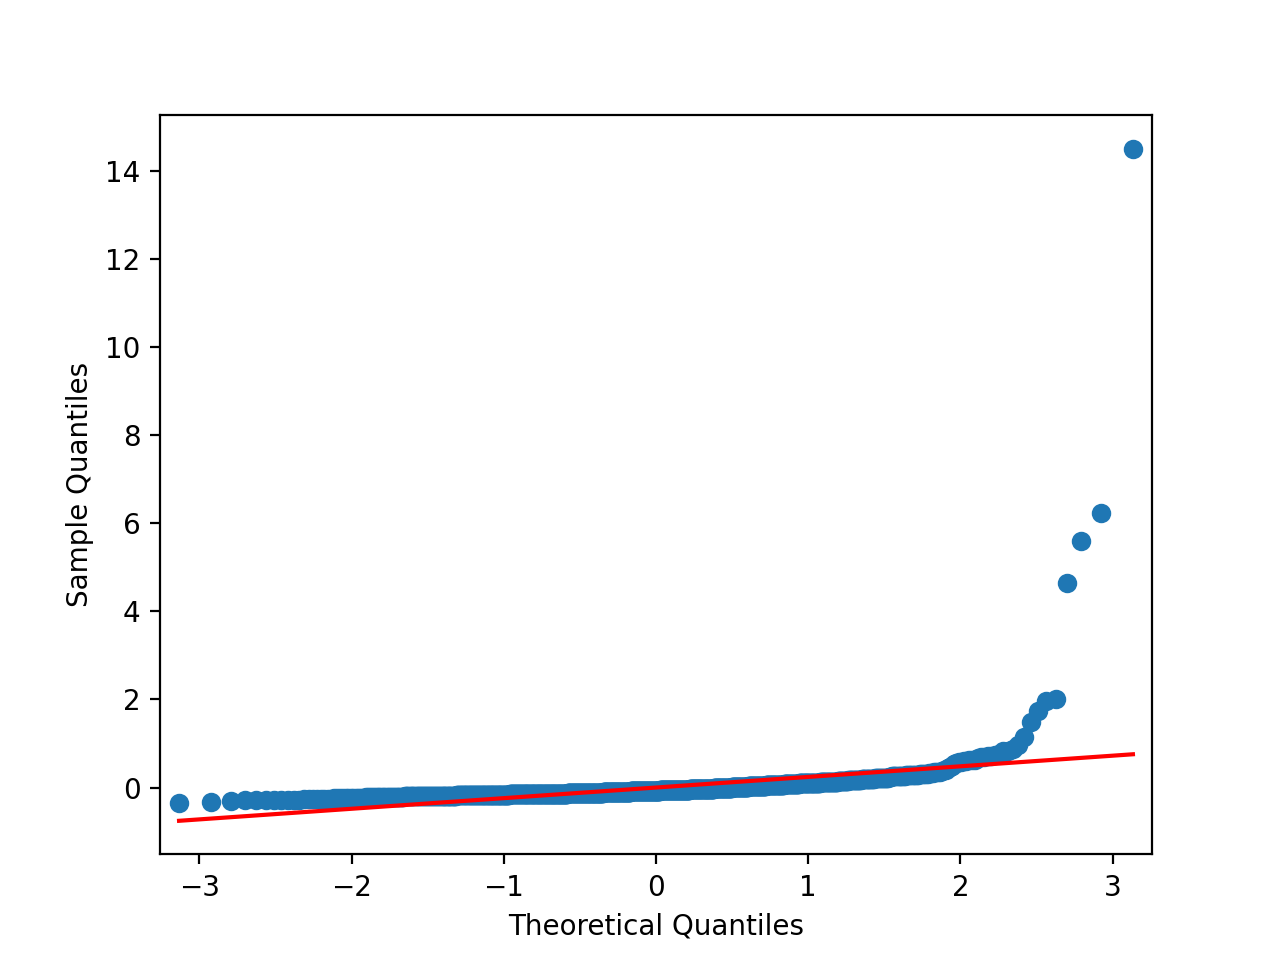

In [69]:
import statsmodels.api as sm
fig1=sm.qqplot(reg1.resid, line='r')

# Reg2

<IPython.core.display.Javascript object>


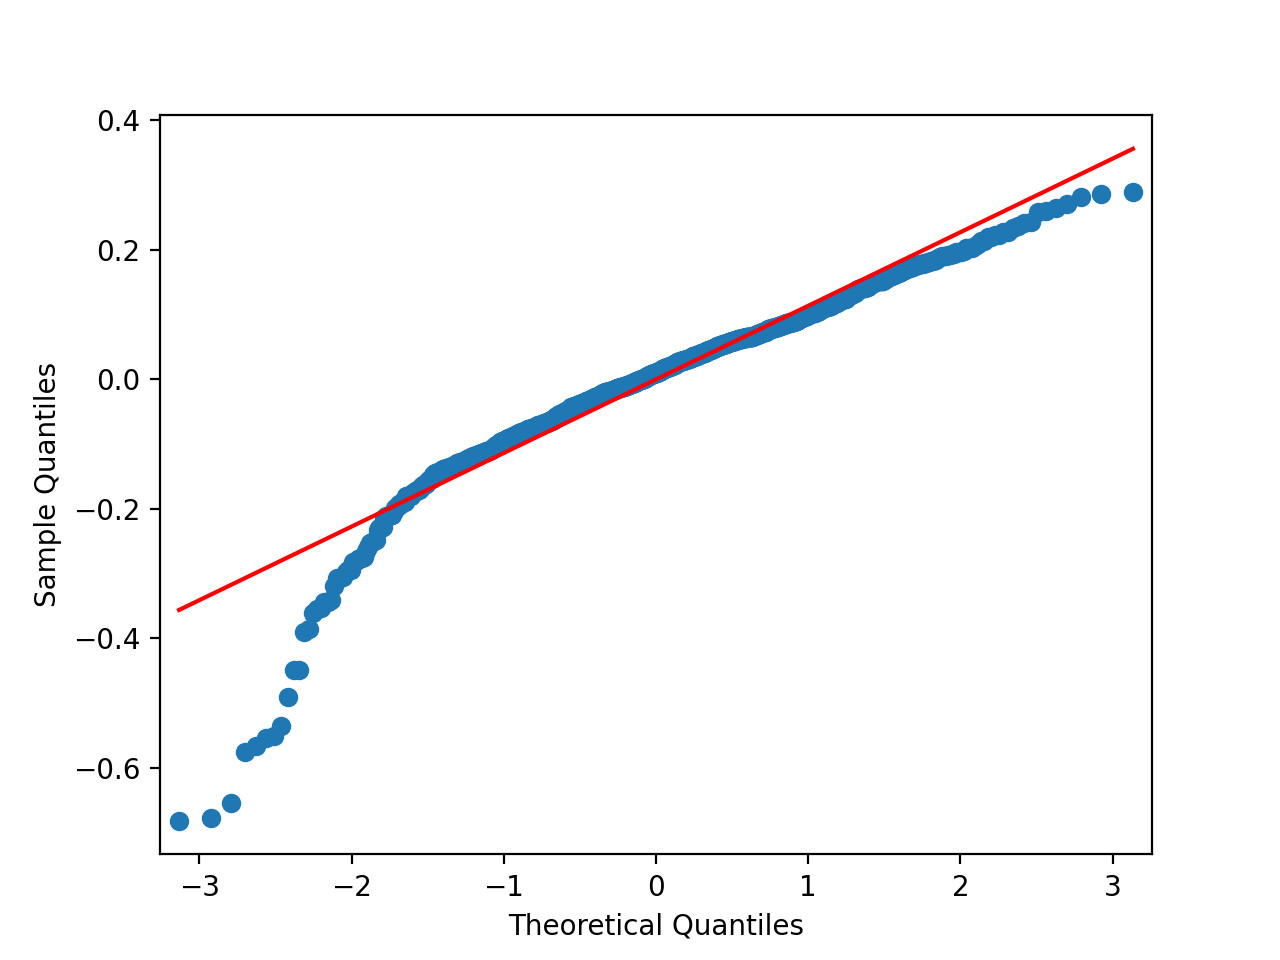

In [70]:
import statsmodels.api as sm
fig1=sm.qqplot(reg2.resid, line='r')

# Reg3

<IPython.core.display.Javascript object>


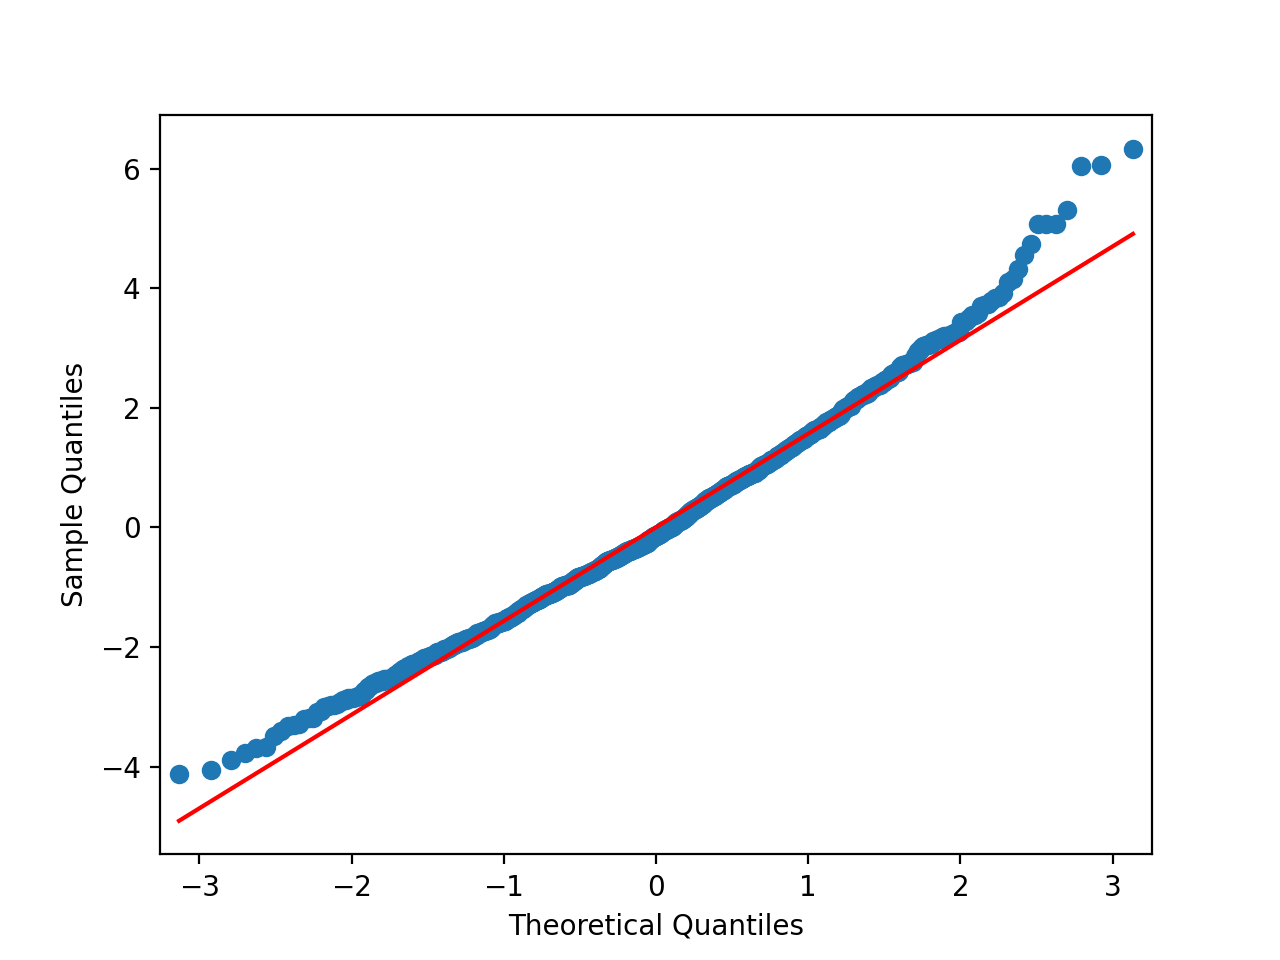

In [71]:
import statsmodels.api as sm
fig1=sm.qqplot(reg3.resid, line='r')

# Reg4

<IPython.core.display.Javascript object>


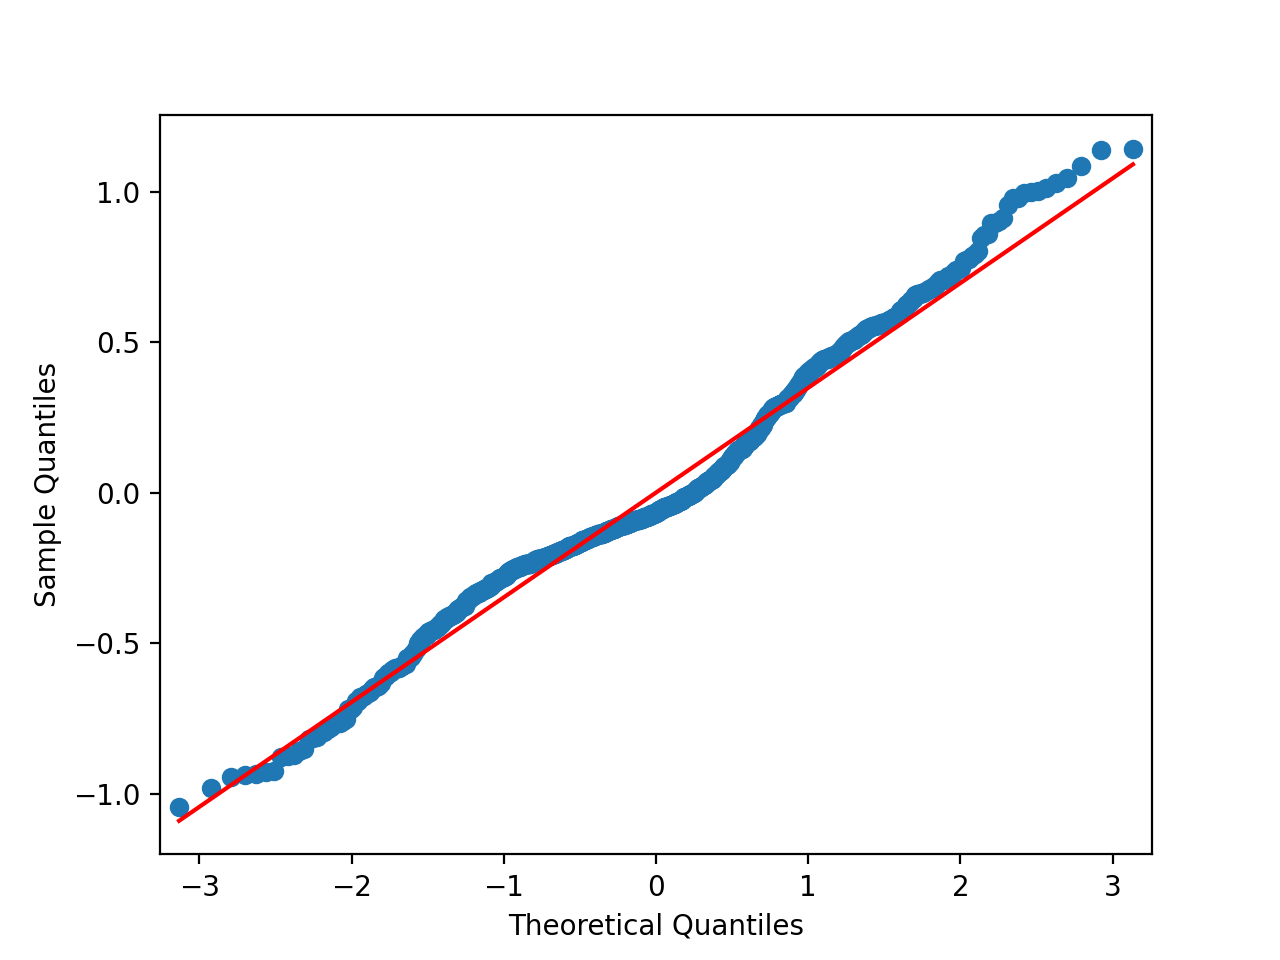

In [64]:
import statsmodels.api as sm
fig1=sm.qqplot(reg4.resid, line='r')

# Reg5

<IPython.core.display.Javascript object>


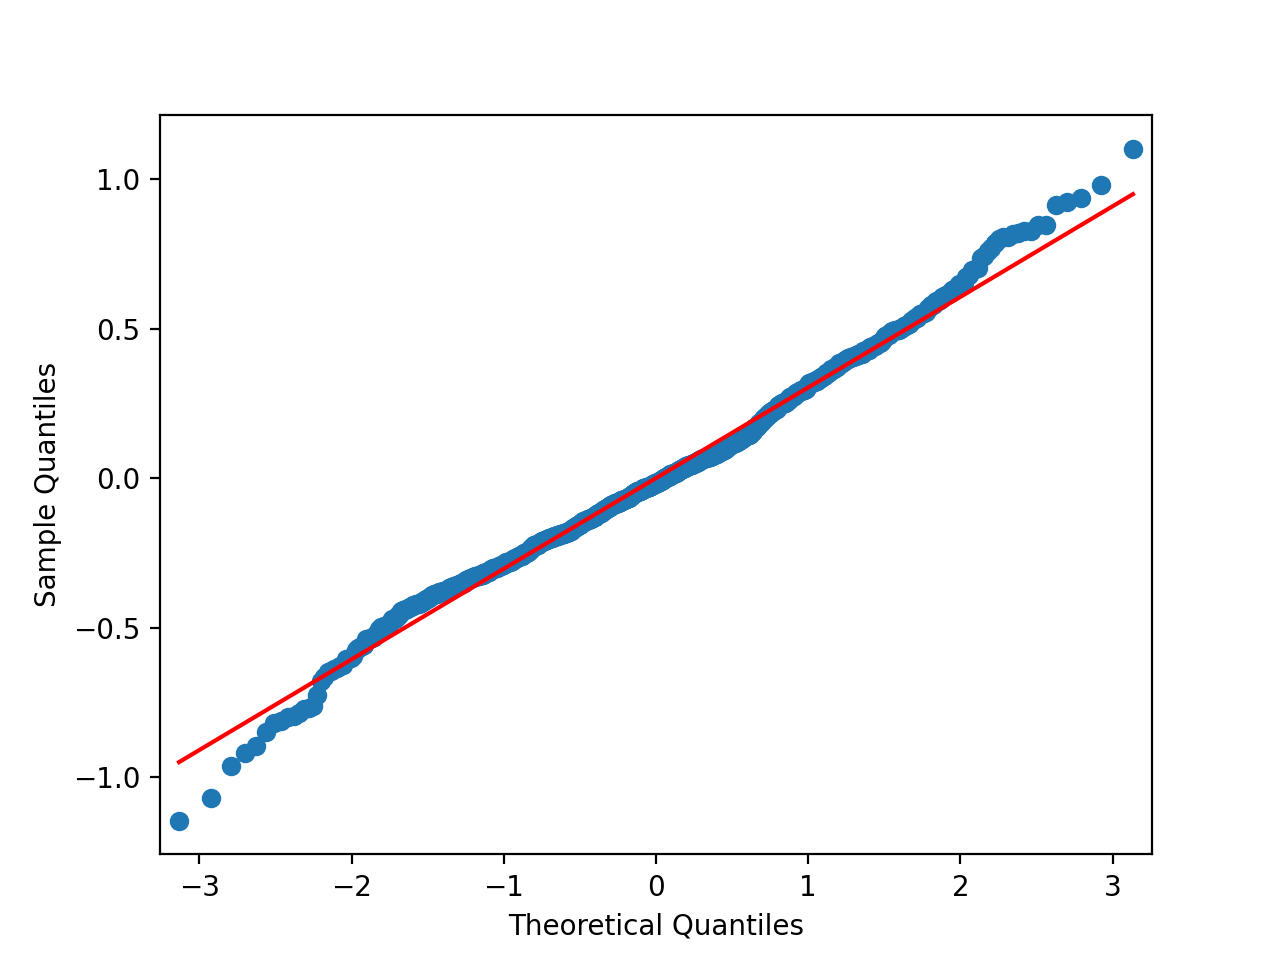

In [65]:
import statsmodels.api as sm
fig1=sm.qqplot(reg5.resid, line='r')

# Reg6

<IPython.core.display.Javascript object>


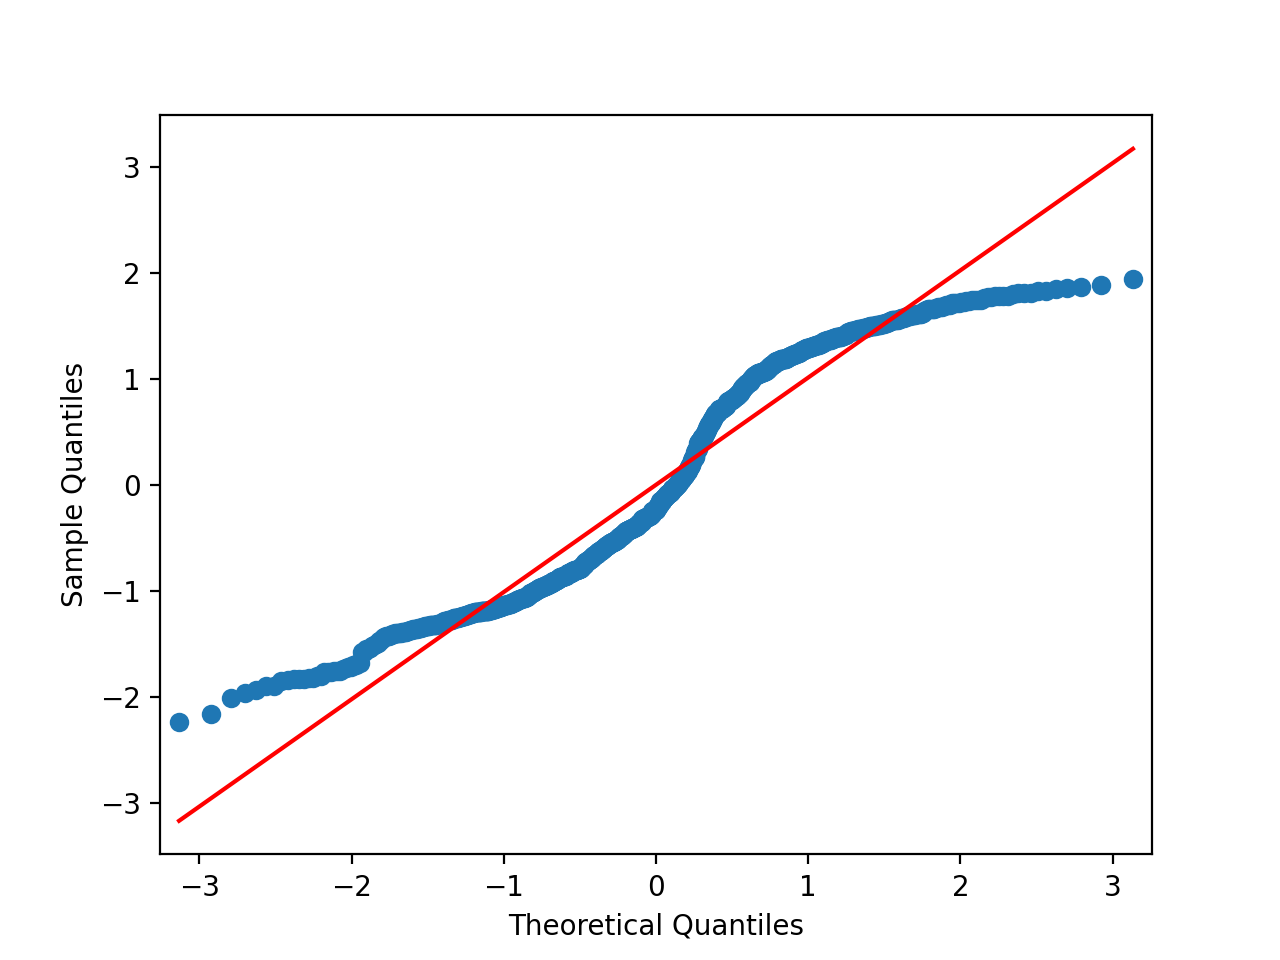

In [66]:
import statsmodels.api as sm
fig1=sm.qqplot(reg6.resid, line='r')

# Standardised Residual plots reg1,reg3,reg5

<IPython.core.display.Javascript object>


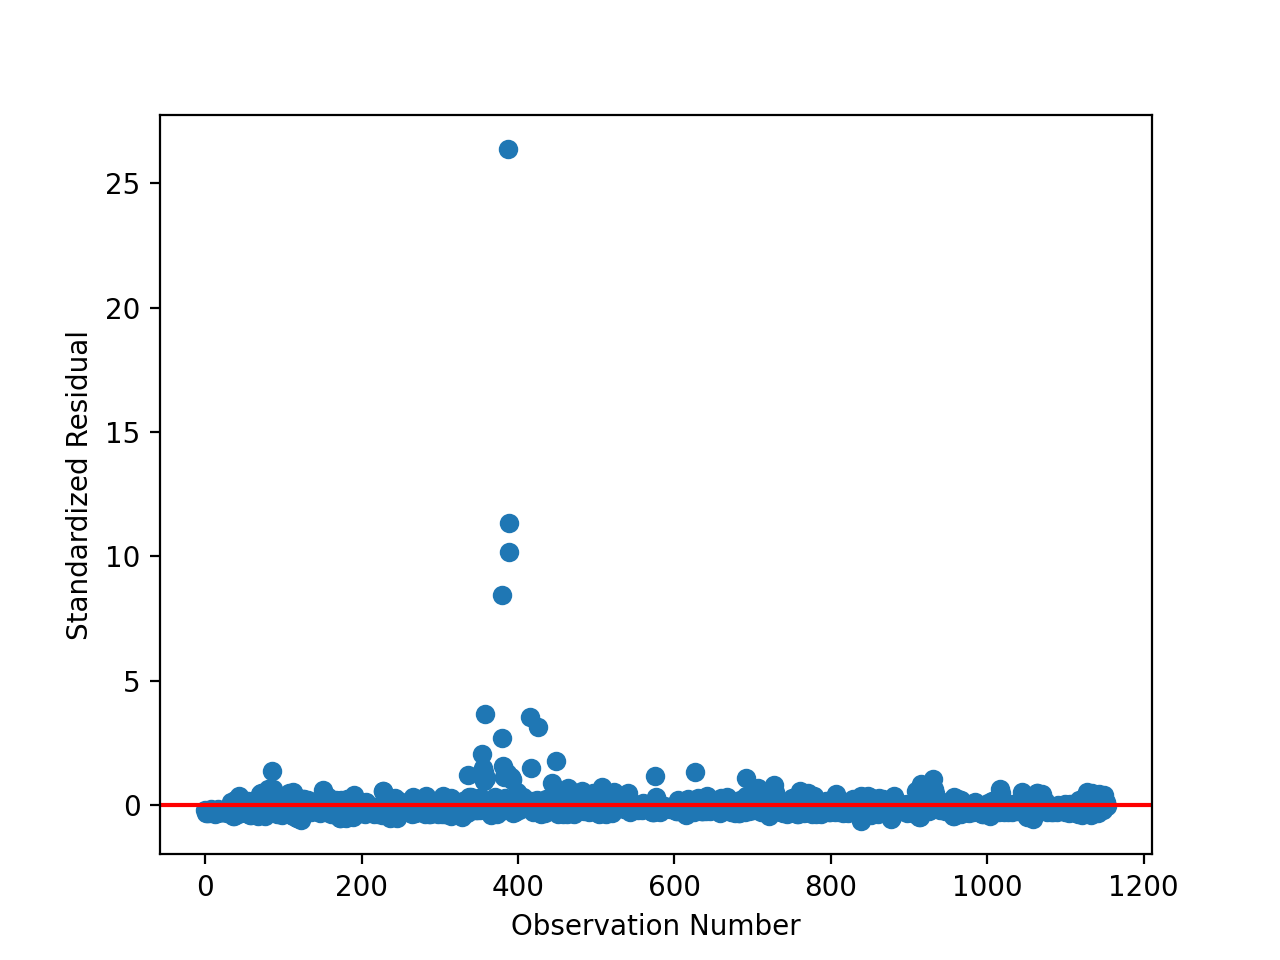

Text(0.5, 0, 'Observation Number')

In [94]:
# simple plot of residuals
stdres1=pd.DataFrame(reg1.resid_pearson)
plt.figure()
plt.plot(stdres1, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

<IPython.core.display.Javascript object>


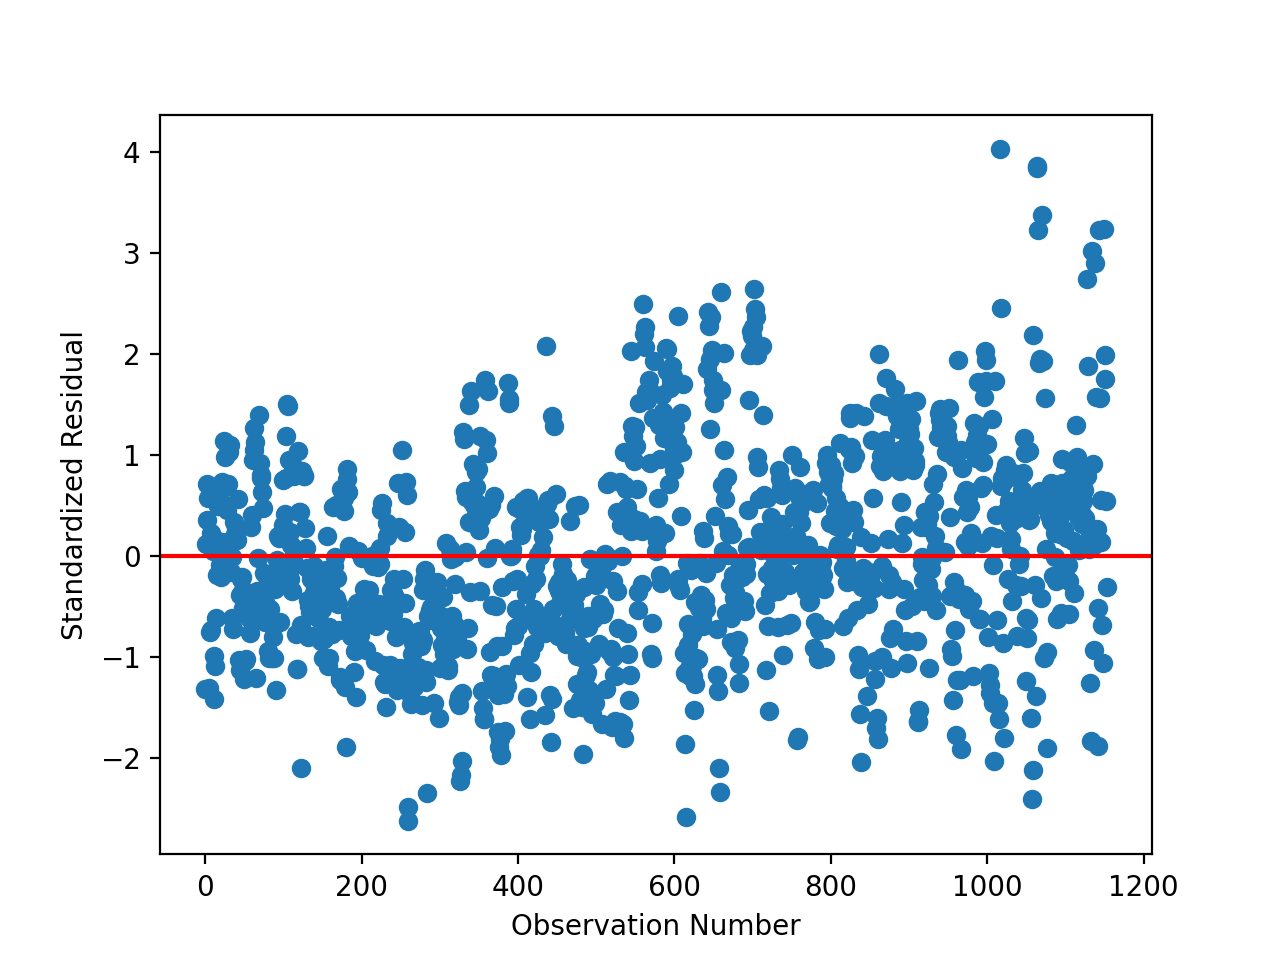

Text(0.5, 0, 'Observation Number')

In [33]:
# simple plot of residuals
stdres3=pd.DataFrame(reg3.resid_pearson)
plt.figure()
plt.plot(stdres3, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

<IPython.core.display.Javascript object>


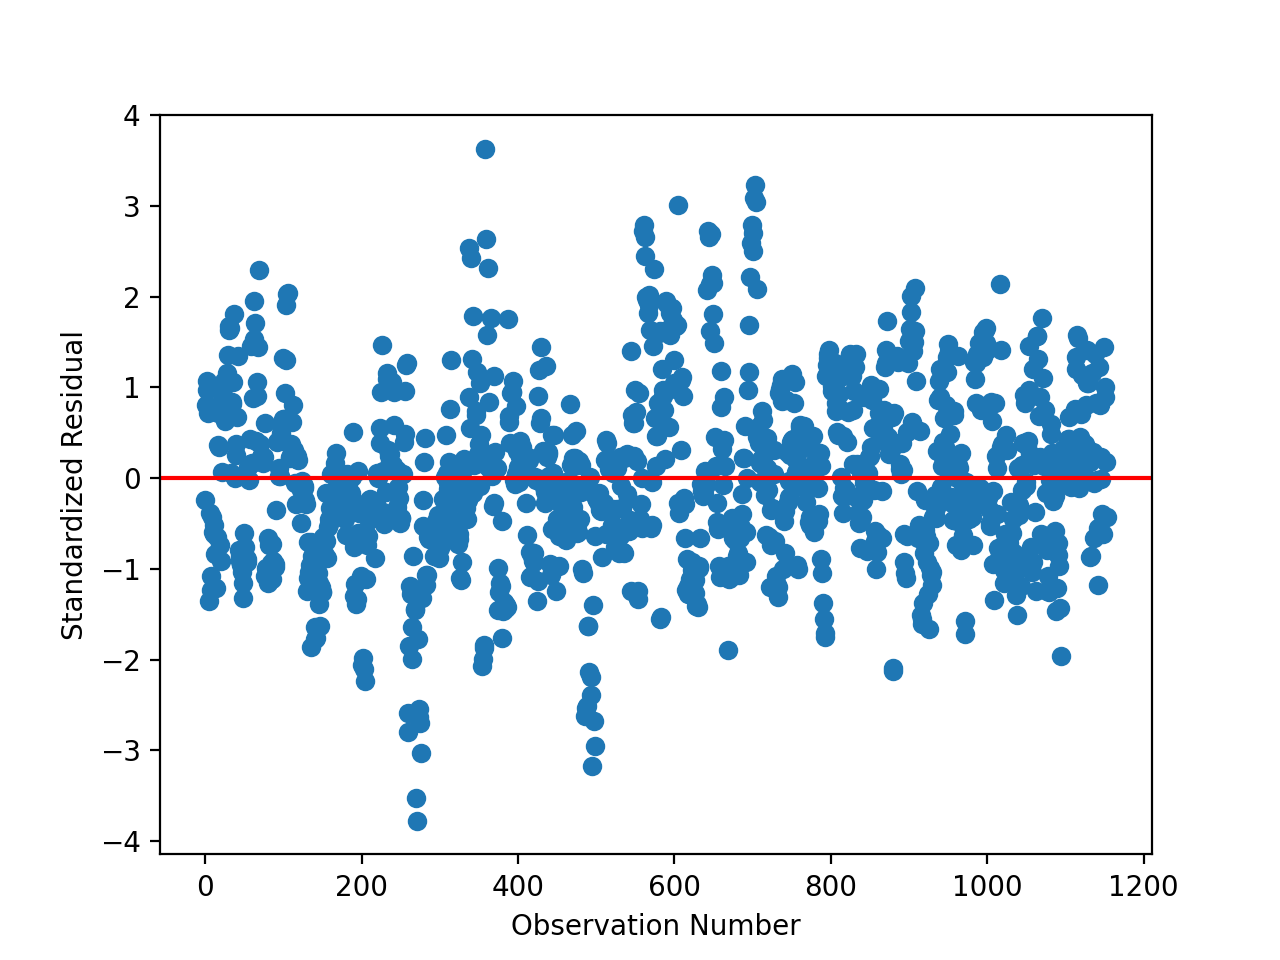

Text(0.5, 0, 'Observation Number')

In [75]:
# simple plot of residuals
stdres5=pd.DataFrame(reg5.resid_pearson)
plt.figure()
plt.plot(stdres5, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

# Observations value evaluating model 

In [84]:
percentage_over2sd = (np.count_nonzero( stdres1[0] > 2) + np.count_nonzero( stdres1[0] < -2))/len(stdres1)*100
print ('reg1 over 2sd',percentage_over2sd,'%')

percentage_over2sd = (np.count_nonzero( stdres3[0] > 2) + np.count_nonzero( stdres3[0] < -2))/len(stdres3)*100
print ('reg3 over 2sd',percentage_over2sd,'%')

percentage_over2sd = (np.count_nonzero( stdres5[0] > 2) + np.count_nonzero( stdres5[0] < -2))/len(stdres5)*100
print ('reg5 over 2sd',percentage_over2sd,'%')


reg1 over 2sd 0.779896013864818 %
reg3 over 2sd 4.419410745233969 %
reg5 over 2sd 4.9393414211438476 %


In [85]:
percentage_over2_5sd = (np.count_nonzero( stdres1[0] > 2.5) + np.count_nonzero( stdres1[0] < -2.5))/len(stdres1)*100
print ('reg1 over 2.5sd',percentage_over2_5sd,'%')

percentage_over2_5sd = (np.count_nonzero( stdres3[0] > 2.5) + np.count_nonzero( stdres3[0] < -2.5))/len(stdres3)*100
print ('reg3 over 2.5sd',percentage_over2_5sd,'%')

percentage_over2_5sd = (np.count_nonzero( stdres5[0] > 2.5) + np.count_nonzero( stdres5[0] < -2.5))/len(stdres5)*100
print ('reg5 over 2.5sd',percentage_over2_5sd,'%')


reg1 over 2.5sd 0.6932409012131715 %
reg3 over 2.5sd 1.2131715771230502 %
reg5 over 2.5sd 2.68630849220104 %
